In [190]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [191]:
def idToName(ID, dic):
    '''
    ID: champion ID as listed in original dataframe
    dic: champInfo from json, defined above

    used to convert ID's to champion names
    '''
    champ = dic['name'][ID]
    return champ


def getTags(name, data):
    '''
    name: name of champion
    data: champinfo
    '''
    tags = champinfo['tags'][name][0]
    return tags

In [192]:
games = pd.read_csv('games.csv')

In [193]:
games.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [194]:
games.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [195]:
cjdict = pd.read_json('champion_info_2.json')
champinfo = pd.read_json((cjdict['data']).to_json(), orient='index')
champinfo.head()

,id,key,name,tags,title
Aatrox,266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
Ahri,103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
Akali,84,Akali,Akali,[Assassin],the Fist of Shadow
Alistar,12,Alistar,Alistar,"[Tank, Support]",the Minotaur
Amumu,32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


In [196]:
sjdict = pd.read_json('summoner_spell_info.json')
spellinfo = pd.read_json((sjdict['data']).to_json(), orient='index')
spellinfo.head()

,description,id,key,name,summonerLevel
1,Removes all disables (excluding suppression an...,1,SummonerBoost,Cleanse,6
11,Deals 390-1000 true damage (depending on champ...,11,SummonerSmite,Smite,10
12,"After channeling for 4.5 seconds, teleports yo...",12,SummonerTeleport,Teleport,6
13,Restores 50% of your champion's maximum Mana. ...,13,SummonerMana,Clarity,1
14,"Ignites target enemy champion, dealing 70-410 ...",14,SummonerDot,Ignite,10


In [197]:
champinfo.set_index(['id'], inplace=True)
champinfo.head()

,key,name,tags,title
id,,,,
266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
84,Akali,Akali,[Assassin],the Fist of Shadow
12,Alistar,Alistar,"[Tank, Support]",the Minotaur
32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


In [198]:
champcols = ['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id', 
             't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']
bancols = ['t1_ban1', 't1_ban2', 't1_ban3','t1_ban4', 't1_ban5',
           't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4','t2_ban5']
spellcols = ['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
            't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5_sum1', 't1_champ5_sum2',
            't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3_sum1', 't2_champ3_sum2',
            't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5_sum1', 't2_champ5_sum2']

In [199]:
for col in champcols:
    games[col] = games[col].apply(lambda x: idToName(x, champinfo))

for col in bancols:
    games[col] = games[col].apply(lambda x: idToName(x, champinfo)) 

for col in spellcols:
    games[col] = games[col].apply(lambda x: idToName(x, spellinfo))

In [200]:
games[champcols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [201]:
games[bancols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [202]:
games[spellcols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust
1,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,Flash,Teleport,Flash,Ignite,Smite,Flash,Flash,Ignite,Flash,Heal
2,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,Flash,Heal,Ignite,Flash,Flash,Teleport,Flash,Smite,Heal,Flash
3,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,Ignite,Flash,Smite,Flash,Flash,Exhaust,Flash,Ignite,Flash,Heal
4,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,Exhaust,Flash,Flash,Teleport,Smite,Flash,Flash,Teleport,Flash,Heal


In [203]:
champinfo.set_index(['name'], inplace=True)
champinfo.head()

,key,tags,title
name,,,
Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
Akali,Akali,[Assassin],the Fist of Shadow
Alistar,Alistar,"[Tank, Support]",the Minotaur
Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


In [204]:
for col in champcols:
    games[col + '_tags'] = games[col].apply(lambda x: getTags(x, champinfo))

In [205]:
for i in champcols:
    print("games['" + i + "'],")

games['t1_champ1id'],
games['t1_champ2id'],
games['t1_champ3id'],
games['t1_champ4id'],
games['t1_champ5id'],
games['t2_champ1id'],
games['t2_champ2id'],
games['t2_champ3id'],
games['t2_champ4id'],
games['t2_champ5id'],


In [206]:
picks = pd.concat(
[games['t1_champ1id'],
games['t1_champ2id'],
games['t1_champ3id'],
games['t1_champ4id'],
games['t1_champ5id'],
games['t2_champ1id'],
games['t2_champ2id'],
games['t2_champ3id'],
games['t2_champ4id'],
games['t2_champ5id']], ignore_index = True)

sortedpicks = sorted(picks)

bans = pd.concat(
[games['t1_ban1'],
games['t1_ban2'],
games['t1_ban3'],
games['t1_ban4'],
games['t1_ban5'],
games['t2_ban1'],
games['t2_ban2'],
games['t2_ban3'],
games['t2_ban4'],
games['t2_ban5']], ignore_index = True)

sortedbans = sorted(bans)

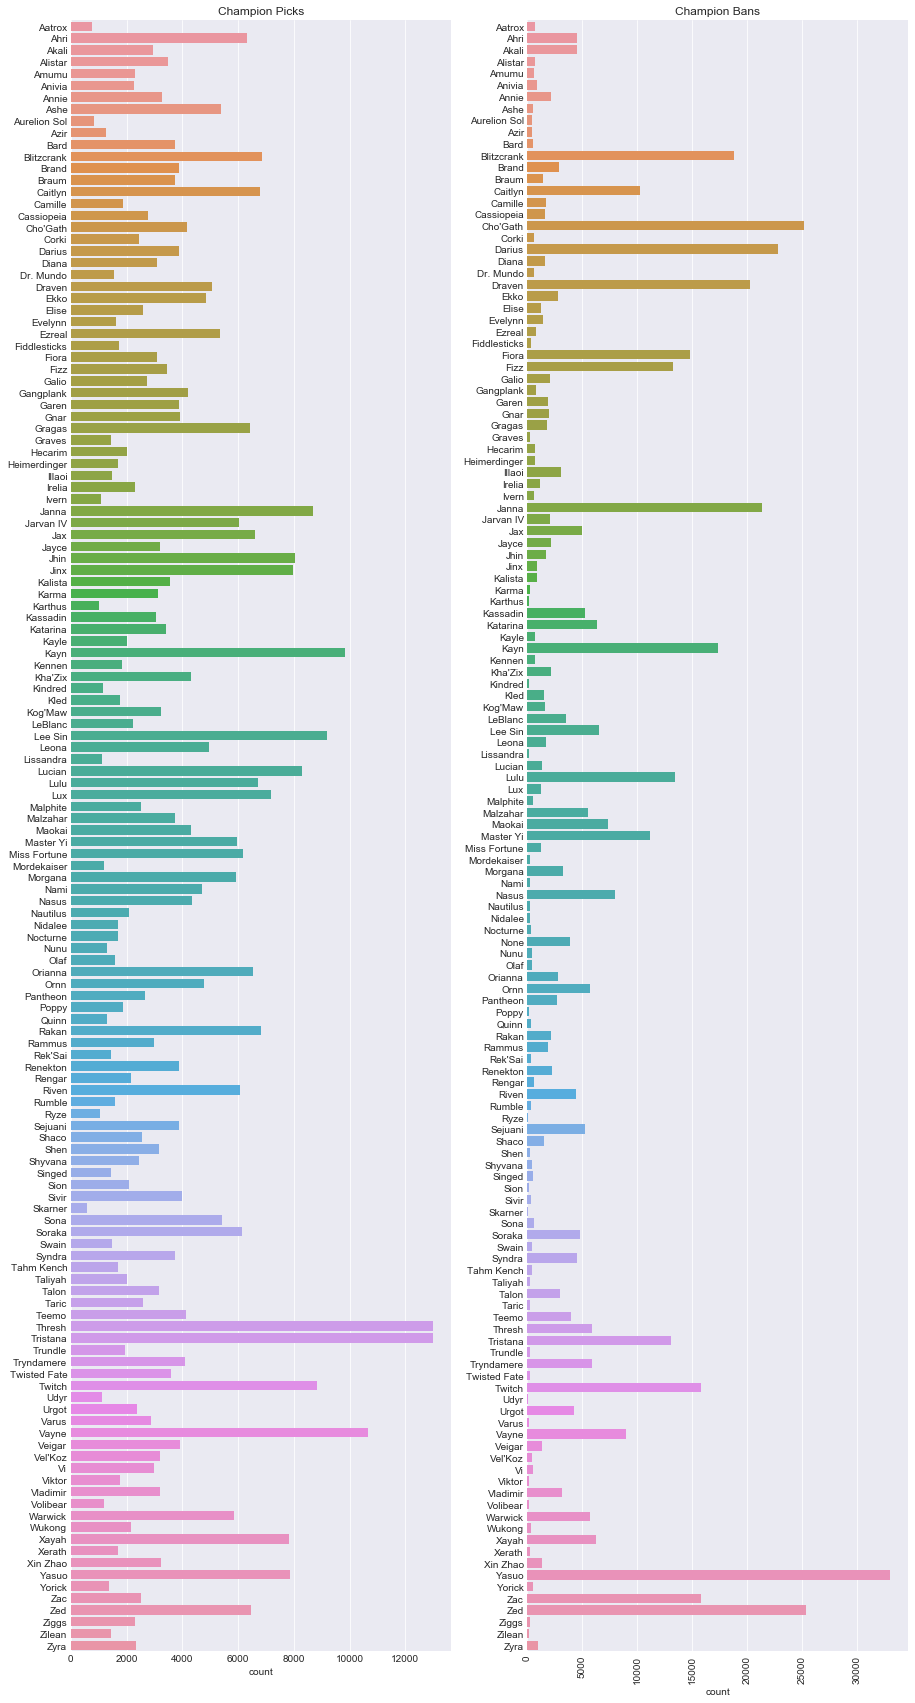

In [207]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sortedpicks, data = games, ax = ax1)
sns.countplot(y=sortedbans, data = games, ax = ax2)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')

In [208]:
tagcols = ['t1_champ1id_tags', 't1_champ2id_tags', 't1_champ3id_tags',
       't1_champ4id_tags', 't1_champ5id_tags', 't2_champ1id_tags',
       't2_champ2id_tags', 't2_champ3id_tags', 't2_champ4id_tags',
       't2_champ5id_tags']

In [209]:
tagstotal = games[tagcols].apply(pd.value_counts)
tagstotal['count'] = tagstotal[tagcols].sum(axis = 1)

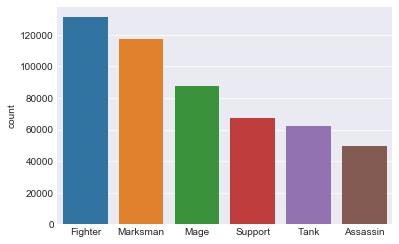

In [210]:
sns.barplot(x = tagstotal.index, y = tagstotal['count'], data = tagstotal)

In [211]:
spellscols = ['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
            't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5_sum1', 't1_champ5_sum2',
            't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3_sum1', 't2_champ3_sum2',
            't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5_sum1', 't2_champ5_sum2']

spellstotal = games[spellscols].apply(pd.value_counts)
spellstotal['count'] = spellstotal[spellscols].sum(axis = 1)

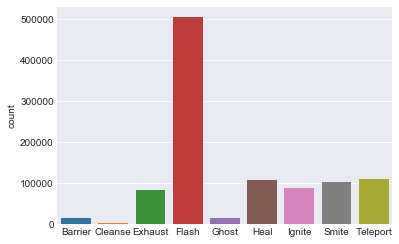

In [212]:
sns.barplot(x = spellstotal.index, y = spellstotal['count'], data = spellstotal)

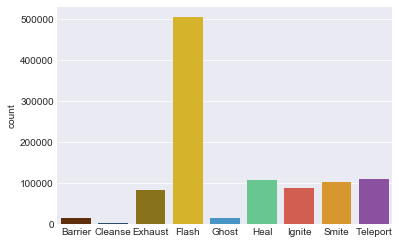

In [213]:
spellColors = ["#6E2C00","#1A5276","#9A7D0A","#F1C40F","#3498DB","#58D68D","#E74C3C","#F39C12","#8E44AD"]
sns.barplot(x=spellstotal.index,y=spellstotal['count'],palette=spellColors)

In [214]:
gamesclean = games.replace([0,1,2], ['neither', 'blue', 'red'])

In [215]:
gamesclean.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,blue,red,blue,blue,blue,blue,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,blue,blue,blue,blue,neither,blue,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,blue,red,blue,blue,blue,red,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,blue,blue,blue,blue,blue,blue,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,blue,red,blue,blue,blue,blue,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [216]:
firsts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
firsttotals = gamesclean[firsts].apply(pd.value_counts)
newindex = ['blue', 'red', 'neither']
firstsort = firsttotals.reindex(newindex)
firstsort

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
blue,26113,25861,23054,14758,24690,12948
red,24822,24416,22160,16474,24800,12363
neither,555,1213,6276,20258,2000,26179


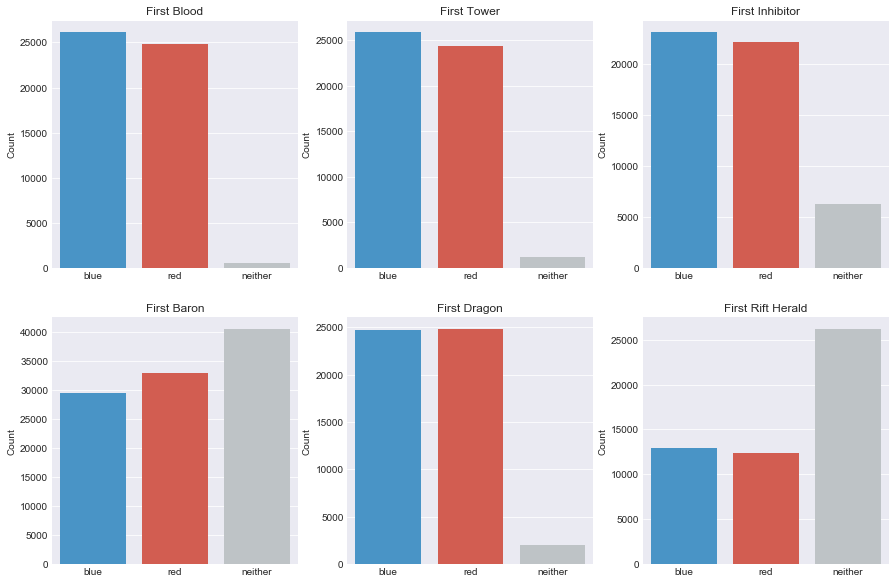

In [220]:
plotColors = ['#3498DB','#E74C3C','#BDC3C7']
firstlabels = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
nrows, ncols = 2,3
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstsort.index,y=firstsort[firstsort.columns[i-1]],palette=plotColors)
    ax.set_ylabel('Count')
    ax.yaxis.set_ticklabels([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
    ax.set_title(firstlabels[i-1])